In [1]:
# Importing libraries
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.cluster import KMeans

In [2]:
# Importing files
precip = pd.read_excel(r"C:\Users\joaoa\Desktop\Doutoramento\Daily_rainfall_analysis\ERA5_Rainfall_PT_mm_Oct1981_Sep2023.xlsx")
local = pd.read_csv(r"C:\Users\joaoa\Desktop\Doutoramento\Professora\Nova pasta\Todos os Pontos (temperatura)\local.cvs")

# Checking nulls
print("Nulls:", precip.isnull().sum().sum())

# Creating column "year"
precip.insert(0, "year", 0)
precip.insert(1, "day", 0)
for row in range(0,len(precip)):
    precip.loc[row, "year"] = 1981 + row // 365
    precip.loc[row, "day"] = (row + 1) - 365*(row // 365)
precip = precip.drop(["Index"], axis = 1)
precip

Nulls: 0


,year,day,P0000,P0001,P0002,P0003,P0004,P0005,P0006,P0007,...,P1047,P1048,P1055,P1056,P1057,P1058,P1059,P1062,P1063,P1064
0,1981,1,18.59,29.60,28.42,25.24,21.88,19.20,17.59,28.02,...,0.44,0.51,0.25,0.24,0.25,0.26,0.27,0.15,0.15,0.14
1,1981,2,3.65,9.55,8.22,6.58,4.94,3.69,2.98,10.32,...,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1981,3,7.53,15.72,14.61,12.94,11.11,9.19,7.73,15.97,...,2.12,2.66,1.65,1.61,1.32,0.93,0.59,1.18,0.99,0.83
3,1981,4,51.39,47.14,49.84,52.24,54.10,53.28,50.52,45.37,...,0.29,0.47,0.53,0.49,0.43,0.35,0.28,0.25,0.24,0.22
4,1981,5,51.86,30.62,38.98,48.55,57.39,62.94,66.47,28.54,...,9.71,10.47,13.67,13.27,12.35,11.22,10.13,10.34,9.65,9.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15325,2022,361,0.05,0.03,0.02,0.02,0.02,0.02,0.02,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15326,2022,362,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15327,2022,363,0.06,0.50,0.38,0.24,0.10,0.03,0.01,0.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15328,2022,364,0.06,0.01,0.02,0.03,0.05,0.05,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
# Creating a dictionary with all dataframes
df_dict = {}
max_d = 9
D = range(1,max_d+1)

for days in D:
    # Size of the group
    d = days

    # Rolling sum
    df_roll = precip
    df_roll = df_roll.rolling(d).sum()
    df_roll[["year","day"]] = precip[["year","day"]]
    df_roll = df_roll.loc[df_roll["day"] >= d, :]
    df_roll = df_roll.drop(["day"], axis = 1)

    # Grouping by "year" computing its maximum value
    max_precip = df_roll.groupby("year").max()
    max_precip.index.name = None

    # Standardizing dataframe
    scaler = StandardScaler() 
    stand_precip = scaler.fit_transform(max_precip) 
    stand_precip = pd.DataFrame(stand_precip, columns = max_precip.columns)
    stand_precip = stand_precip*np.sqrt((len(stand_precip)-1)/len(stand_precip))

    # Transposing dataframe
    transp = stand_precip.transpose()

    # Clustering (k-means)
    max_k = 9
    K = range(2, max_k+1)
    inertia = []
    X = transp
    X.columns = X.columns.astype(str)

    for n in K:
        kmeans = KMeans(n_clusters = n, max_iter=1000, tol=0.00000001, random_state = 42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        kmeans.labels_ += 1
        transp[str(n) + "_clusters|" + str(d) + "_days"] = kmeans.labels_
    
    df_dict[str(d) + "_days"] = transp

In [4]:
df_dict["2_days"]

,0,1,2,3,4,5,6,7,8,9,...,40,41,2_clusters|2_days,3_clusters|2_days,4_clusters|2_days,5_clusters|2_days,6_clusters|2_days,7_clusters|2_days,8_clusters|2_days,9_clusters|2_days
P0000,1.154295,-1.160579,0.093082,0.173360,-0.534298,-0.149952,2.043954,-0.622274,1.601324,-0.863109,...,-2.449980,0.272883,2,3,3,3,1,4,7,5
P0001,-0.320933,-0.477863,-0.592107,-0.018373,-0.161911,-0.792559,2.155623,-1.245771,0.639475,-1.206852,...,-1.985223,0.198817,2,3,3,3,1,4,7,5
P0002,-0.484521,-0.679189,-0.572186,0.026858,-0.144175,-0.716576,2.206881,-1.087863,0.815414,-1.241707,...,-2.075814,0.203048,2,3,3,3,1,4,7,5
P0003,0.174004,-0.891544,-0.541383,0.033849,-0.141004,-0.620820,2.199186,-0.997003,1.065157,-1.025765,...,-2.226904,0.223766,2,3,3,3,1,4,7,5
P0004,0.878153,-1.069724,-0.111215,0.043552,-0.167709,-0.485788,2.069287,-0.886947,1.290706,-0.762564,...,-2.387140,0.133754,2,3,3,3,1,4,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P1058,-0.373304,-0.656313,2.654244,-0.648452,-0.995739,-0.863483,0.508555,1.801980,2.276899,-0.562440,...,-0.379779,-0.367293,1,1,4,1,2,2,1,7
P1059,-0.275007,-0.675083,2.777220,-0.804345,-0.939980,-0.873983,0.324423,1.823228,2.172327,-0.571764,...,-0.439316,-0.292303,1,1,4,1,2,2,1,7
P1062,0.072410,-0.604370,2.529303,-0.383158,-1.291121,-0.778891,0.945015,1.168039,2.393766,-0.652419,...,-0.782517,-0.452060,1,1,4,1,2,2,1,7
P1063,0.164883,-0.597036,2.724184,-0.482338,-1.259732,-0.791384,0.876280,1.259971,2.264939,-0.656660,...,-0.778185,-0.419983,1,1,4,1,2,2,1,7


In [5]:
# Creating dataframes based on number of clusters
df_index = pd.DataFrame(index = transp.index)

for n in K:
    df_aux = df_index
    for d in D:
        df_aux = pd.concat([df_aux, df_dict[str(d) + "_days"].iloc[:, 40+n]], axis = 1)
    
    df_aux = df_aux.astype(str)
    df_aux["Total"] = ""
    
    for d in D:
        df_aux["Total"] += df_aux.iloc[:,d-1]
    
    df_dict[str(n) + "_clusters"] = df_aux

In [6]:
df_dict["5_clusters"]

,5_clusters|1_days,5_clusters|2_days,5_clusters|3_days,5_clusters|4_days,5_clusters|5_days,5_clusters|6_days,5_clusters|7_days,5_clusters|8_days,5_clusters|9_days,Total
P0000,5,3,5,5,3,3,3,3,3,535533333
P0001,5,3,5,5,3,3,3,3,3,535533333
P0002,5,3,5,5,3,3,3,3,3,535533333
P0003,5,3,5,5,3,3,3,3,3,535533333
P0004,5,3,5,5,3,3,3,3,3,535533333
...,...,...,...,...,...,...,...,...,...,...
P1058,3,1,4,4,4,5,5,4,5,314445545
P1059,3,1,4,4,4,5,5,4,5,314445545
P1062,3,1,4,4,4,5,5,4,5,314445545
P1063,3,1,4,4,4,5,5,4,5,314445545


In [7]:
# Combinations list
my_list = []
lista = []

for num in range(1,d+1):
    my_list.append(num)

for p in range(2, d+1):
    lista.append(my_list[0:p])        
              
lista2 = []
for l in lista:
    list_ = []
    for n in l:
        list_.append(n-1)
    lista2.append(list_)
        
lista

[[1, 2],
 [1, 2, 3],
 [1, 2, 3, 4],
 [1, 2, 3, 4, 5],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [8]:
my_list

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
# Creating a summary table
dummyarray = np.empty((len(lista),max_k-1))
dummyarray[:] = 0
sintese = pd.DataFrame(dummyarray)
sintese = sintese.astype(int)

cols = []
for _ in K:
    cols.append(str(_) + " clusters")
    
sintese.columns = cols

for _ in range(0,len(lista)):
    sintese.rename(index={_:str(lista[_])},inplace=True)

sintese

,2 clusters,3 clusters,4 clusters,5 clusters,6 clusters,7 clusters,8 clusters,9 clusters
"[1, 2]",0,0,0,0,0,0,0,0
"[1, 2, 3]",0,0,0,0,0,0,0,0
"[1, 2, 3, 4]",0,0,0,0,0,0,0,0
"[1, 2, 3, 4, 5]",0,0,0,0,0,0,0,0
"[1, 2, 3, 4, 5, 6]",0,0,0,0,0,0,0,0
"[1, 2, 3, 4, 5, 6, 7]",0,0,0,0,0,0,0,0
"[1, 2, 3, 4, 5, 6, 7, 8]",0,0,0,0,0,0,0,0
"[1, 2, 3, 4, 5, 6, 7, 8, 9]",0,0,0,0,0,0,0,0


In [10]:
# Creating dataframes based on number of clusters
df_index = pd.DataFrame(index = transp.index)

for n in K:
    
    for zzz in range(0,len(lista)):
        df_aux = df_index
        for d in D:
            df_aux = pd.concat([df_aux, df_dict[str(d) + "_days"].iloc[:, 40+n]], axis = 1)

        df_aux = df_aux.astype(str)
        df_aux = df_aux.iloc[:,lista2[zzz]]
        df_aux["Total"] = ""

        for d in range(1,len(df_aux.columns)):
            df_aux["Total"] += df_aux.iloc[:,d-1]
            
        sintese.iloc[zzz,n-2] = sum(df_aux.groupby("Total").count().sort_values(by = df_aux.columns[0], ascending=False).iloc[:n,0])
sintese.index.names = ["days"]
sintese

,2 clusters,3 clusters,4 clusters,5 clusters,6 clusters,7 clusters,8 clusters,9 clusters
days,,,,,,,,
"[1, 2]",714,855,933,927,874,853,818,805
"[1, 2, 3]",705,787,886,758,793,706,678,655
"[1, 2, 3, 4]",688,780,860,714,710,600,556,511
"[1, 2, 3, 4, 5]",675,762,834,686,611,534,475,409
"[1, 2, 3, 4, 5, 6]",667,700,716,547,543,469,426,370
"[1, 2, 3, 4, 5, 6, 7]",667,657,716,539,540,464,421,367
"[1, 2, 3, 4, 5, 6, 7, 8]",667,645,715,536,534,453,397,344
"[1, 2, 3, 4, 5, 6, 7, 8, 9]",667,642,709,530,523,414,385,341


In [11]:
n = 4
df_aux = df_index
for d in D:
    df_aux = pd.concat([df_aux, df_dict[str(d) + "_days"].iloc[:, 40+n]], axis = 1)

df_aux = df_aux.astype(str)
df_aux = df_aux.iloc[:,[0,1,2,3,4,5,6,7,8]]
df_aux["Total"] = ""

for d in range(1,len(df_aux.columns)):
    df_aux["Total"] += df_aux.iloc[:,d-1]
df_aux

,4_clusters|1_days,4_clusters|2_days,4_clusters|3_days,4_clusters|4_days,4_clusters|5_days,4_clusters|6_days,4_clusters|7_days,4_clusters|8_days,4_clusters|9_days,Total
P0000,3,3,1,1,3,2,2,4,3,331132243
P0001,3,3,1,1,3,2,2,4,3,331132243
P0002,3,3,1,1,3,2,2,4,3,331132243
P0003,3,3,1,1,3,2,2,4,3,331132243
P0004,3,3,1,1,3,2,2,4,3,331132243
...,...,...,...,...,...,...,...,...,...,...
P1058,2,4,3,2,2,3,1,2,2,243223122
P1059,2,4,3,2,2,3,1,2,2,243223122
P1062,2,4,3,2,2,3,1,2,2,243223122
P1063,2,4,3,2,2,3,1,2,2,243223122


In [12]:
df_aux.groupby("Total").count().sort_values(by = df_aux.columns[0], ascending=False).iloc[:4,0]

Total
331132243    230
424341434    173
243223122    161
112414311    145
Name: 4_clusters|1_days, dtype: int64

In [13]:
a = df_aux.groupby("Total").count().sort_values(by = df_aux.columns[0], ascending=False).iloc[:4,0].index[0]
b = df_aux.groupby("Total").count().sort_values(by = df_aux.columns[0], ascending=False).iloc[:4,0].index[1]
c = df_aux.groupby("Total").count().sort_values(by = df_aux.columns[0], ascending=False).iloc[:4,0].index[2]
d = df_aux.groupby("Total").count().sort_values(by = df_aux.columns[0], ascending=False).iloc[:4,0].index[3]

In [14]:
for row in range(0,len(df_aux)):
    if df_aux.iloc[row,9] == a:
        df_aux.iloc[row,0:9] = 5
    elif df_aux.iloc[row,9] == b:
        df_aux.iloc[row,0:9] = 6
    elif df_aux.iloc[row,9] == c:
        df_aux.iloc[row,0:9] = 7
    elif df_aux.iloc[row,9] == d:
        df_aux.iloc[row,0:9] = 8
        
df_aux

,4_clusters|1_days,4_clusters|2_days,4_clusters|3_days,4_clusters|4_days,4_clusters|5_days,4_clusters|6_days,4_clusters|7_days,4_clusters|8_days,4_clusters|9_days,Total
P0000,5,5,5,5,5,5,5,5,5,331132243
P0001,5,5,5,5,5,5,5,5,5,331132243
P0002,5,5,5,5,5,5,5,5,5,331132243
P0003,5,5,5,5,5,5,5,5,5,331132243
P0004,5,5,5,5,5,5,5,5,5,331132243
...,...,...,...,...,...,...,...,...,...,...
P1058,7,7,7,7,7,7,7,7,7,243223122
P1059,7,7,7,7,7,7,7,7,7,243223122
P1062,7,7,7,7,7,7,7,7,7,243223122
P1063,7,7,7,7,7,7,7,7,7,243223122


In [15]:
# Importing coordinates
local = pd.read_csv(r"C:\Users\joaoa\Desktop\Doutoramento\Professora\Nova pasta\Todos os Pontos (temperatura)\local.cvs")

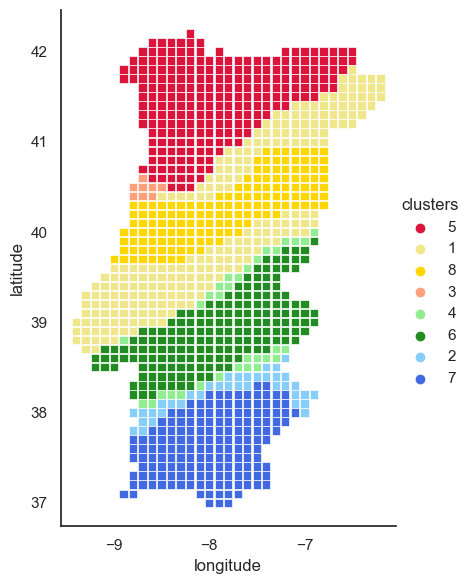

In [17]:
local_1days = local
local_1days["clusters"] = df_aux.iloc[:,0].values

# Visualization with 4 clusters
palette_ = ["crimson", "khaki", "gold", "lightsalmon", "lightgreen", "forestgreen", "lightskyblue", "royalblue"]
sns.set_theme(style='white')
sns.relplot(data = local_1days, x = "longitude", y = "latitude", hue = "clusters", palette = palette_, marker="s", height=6, aspect=0.7)
plt.show()

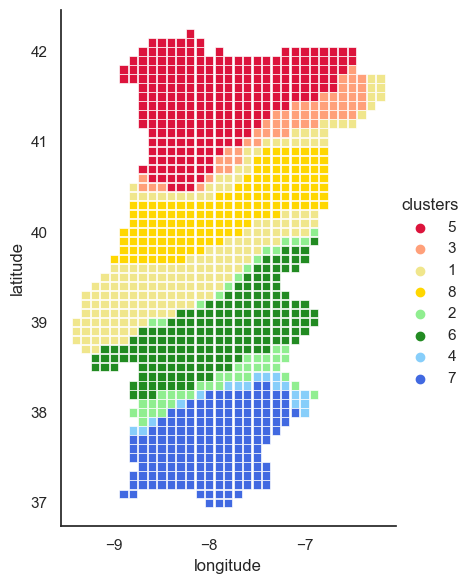

In [20]:
local_2days = local
local_2days["clusters"] = df_aux.iloc[:,1].values

# Visualization with 4 clusters
palette_ = ["crimson", "lightsalmon", "khaki",  "gold","lightgreen", "forestgreen", "lightskyblue", "royalblue"]
sns.set_theme(style='white')
sns.relplot(data = local_2days, x = "longitude", y = "latitude", hue = "clusters", palette = palette_, marker="s", height=6, aspect=0.7)
plt.show()

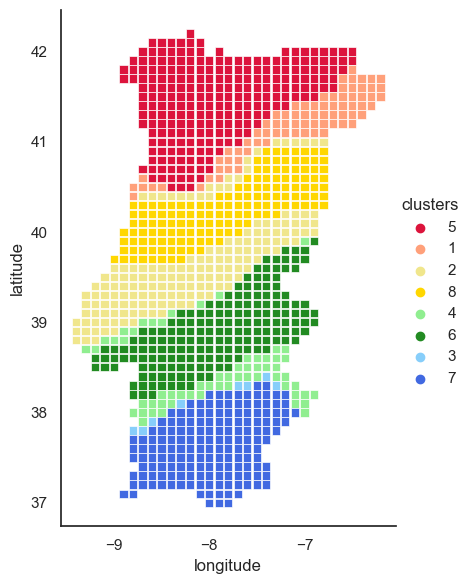

In [22]:
local_3days = local
local_3days["clusters"] = df_aux.iloc[:,2].values

# Visualization with 4 clusters
palette_ = ["crimson", "lightsalmon", "khaki",  "gold","lightgreen", "forestgreen", "lightskyblue", "royalblue"]
sns.set_theme(style='white')
sns.relplot(data = local_3days, x = "longitude", y = "latitude", hue = "clusters", palette = palette_, marker="s", height=6, aspect=0.7)
plt.show()

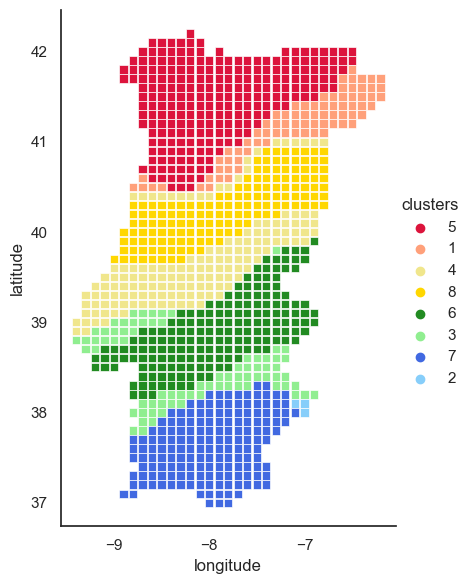

In [30]:
local_4days = local
local_4days["clusters"] = df_aux.iloc[:,3].values

# Visualization with 4 clusters
palette_ = ["crimson", "lightsalmon", "khaki", "gold", "forestgreen", "lightgreen", "royalblue", "lightskyblue"]
sns.set_theme(style='white')
sns.relplot(data = local_4days, x = "longitude", y = "latitude", hue = "clusters", palette = palette_, marker="s", height=6, aspect=0.7)
plt.show()

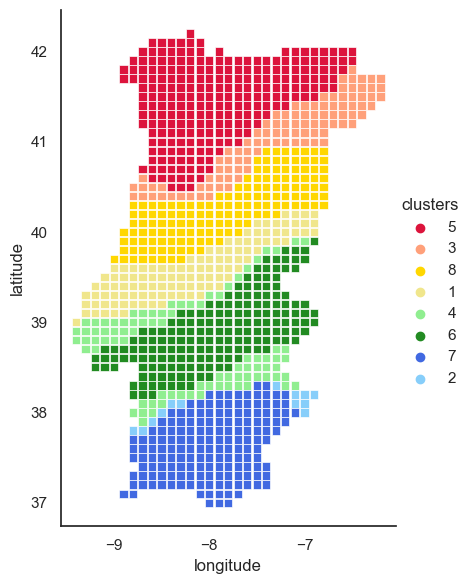

In [29]:
local_5days = local
local_5days["clusters"] = df_aux.iloc[:,4].values

# Visualization with 4 clusters
palette_ = ["crimson", "lightsalmon", "gold", "khaki", "lightgreen", "forestgreen", "royalblue", "lightskyblue"]
sns.set_theme(style='white')
sns.relplot(data = local_5days, x = "longitude", y = "latitude", hue = "clusters", palette = palette_, marker="s", height=6, aspect=0.7)
plt.show()

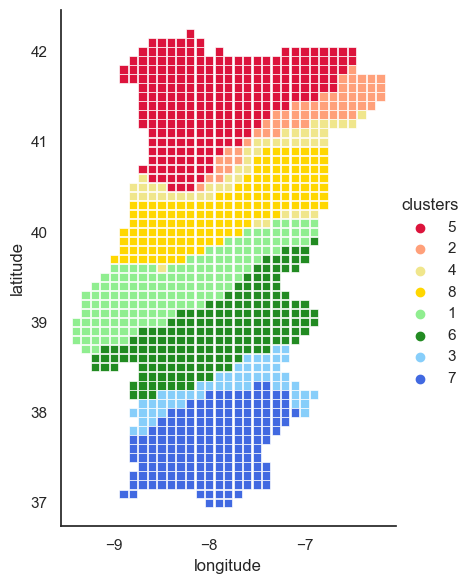

In [25]:
local_6days = local
local_6days["clusters"] = df_aux.iloc[:,5].values

# Visualization with 4 clusters
palette_ = ["crimson", "lightsalmon", "khaki",  "gold","lightgreen", "forestgreen", "lightskyblue", "royalblue"]
sns.set_theme(style='white')
sns.relplot(data = local_6days, x = "longitude", y = "latitude", hue = "clusters", palette = palette_, marker="s", height=6, aspect=0.7)
plt.show()

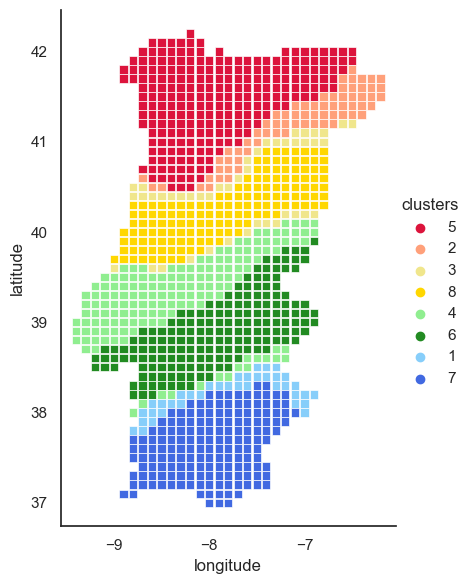

In [26]:
local_7days = local
local_7days["clusters"] = df_aux.iloc[:,6].values

# Visualization with 4 clusters
palette_ = ["crimson", "lightsalmon", "khaki",  "gold","lightgreen", "forestgreen", "lightskyblue", "royalblue"]
sns.set_theme(style='white')
sns.relplot(data = local_7days, x = "longitude", y = "latitude", hue = "clusters", palette = palette_, marker="s", height=6, aspect=0.7)
plt.show()

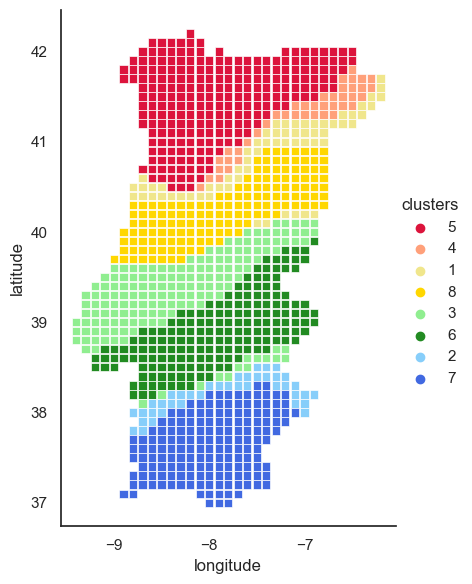

In [27]:
local_8days = local
local_8days["clusters"] = df_aux.iloc[:,7].values

# Visualization with 4 clusters
palette_ = ["crimson", "lightsalmon", "khaki",  "gold","lightgreen", "forestgreen", "lightskyblue", "royalblue"]
sns.set_theme(style='white')
sns.relplot(data = local_8days, x = "longitude", y = "latitude", hue = "clusters", palette = palette_, marker="s", height=6, aspect=0.7)
plt.show()

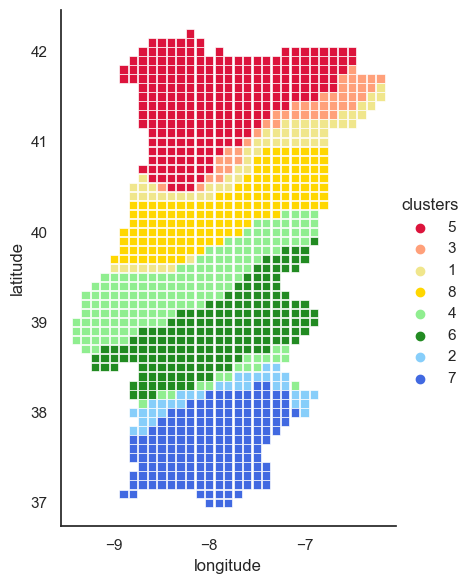

In [28]:
local_9days = local
local_9days["clusters"] = df_aux.iloc[:,8].values

# Visualization with 4 clusters
palette_ = ["crimson", "lightsalmon", "khaki",  "gold","lightgreen", "forestgreen", "lightskyblue", "royalblue"]
sns.set_theme(style='white')
sns.relplot(data = local_9days, x = "longitude", y = "latitude", hue = "clusters", palette = palette_, marker="s", height=6, aspect=0.7)
plt.show()